# PRECISION - RECALL CURVE
---

### Libraries

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
import requests
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, classification_report, confusion_matrix

In [27]:
### Loading and preparing the data

In [28]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
s = requests.get(url).content
data = StringIO(s.decode("utf-8"))

iris = pd.read_csv(data, header=None)
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
print(iris.head())
print(iris["class"].unique())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [33]:
df = iris[iris["class"] != "Iris-setosa"]
print(df["class"].unique())

['Iris-versicolor' 'Iris-virginica']


I chose the value 1 for the Iris versicolor and the value 0 for the Iris virginica. I then replaced the original values in the column class to be able to make the classification.

In [45]:
df = df.replace('Iris-versicolor', 1)
df = df.replace('Iris-virginica', 0)
print(df["class"].unique())

[1 0]


/tmp/ipykernel_1311981/2994534901.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('Iris-virginica', 0)


In [46]:
X = df.drop('class', axis=1)  # Features
y = df['class']               # Target
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features to standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training the Logistic Regression Model

In [47]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

### Prediction

In [48]:
# Predict probabilities for the test set
y_scores = model.predict_proba(X_test_scaled)[:, 1]
# Generate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

### Best treshold (f1-score)

In [52]:
# Find the threshold that gives the best F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1 = f1_scores[best_threshold_index]
# Print the best threshold and corresponding F1-score
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1-score: {best_f1:.2f}")

Best Threshold: 0.45
Best F1-score: 0.92


### Plot Precision Recall Curve

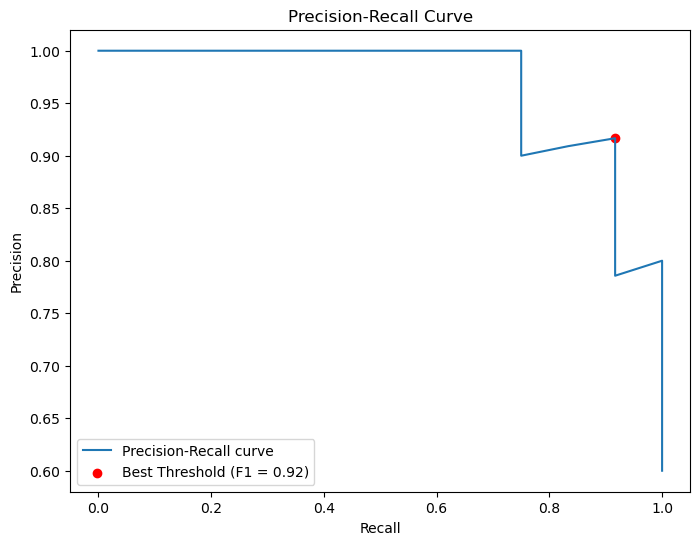

In [53]:
# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
# Plot the threshold points
plt.scatter(recall[best_threshold_index], precision[best_threshold_index], color='red', label=f'Best Threshold (F1 = {best_f1:.2f})')
plt.legend(loc='best')
plt.show()

### Evaluate the Model

In [54]:
# Evaluate the model using the best threshold
y_pred_best = (y_scores >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_best))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        12

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

Confusion Matrix:
 [[ 7  1]
 [ 1 11]]


Here 7 is the number of True Negatives : the number of Iris virginica that were predicted as Iris virginica. And 11 is the number of True Positives : the number of Iris versicolor that were predicted as Iris versicolor.
The number of False Positive and False Negative are equal (1). The model predicted one Iris versicolor as a Iris virginica and it predicted one Iris virginica as a Iris versicolor.